In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import os
import rgc_activation_model as rgcm
import pickle
import time
from matplotlib import cm


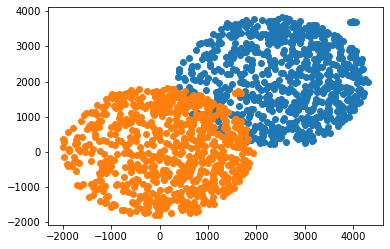

In [2]:
# load spike prob model
spi = pickle.load(open('/Users/alanmardinly/Documents/GitHub/scripts/Biology/patch_clamping/spike_prob_interp.dat','rb'))
# load RGC positions
rgc = pd.read_csv('/Users/alanmardinly/Documents/white paper bits/rgcLocations.csv')
x_vals = rgc['Unnamed: 6'].values
y_vals = rgc['Unnamed: 7'].values
plt.scatter(x_vals, y_vals)
yvals = y_vals-np.mean(y_vals)+50
xvals = x_vals-np.mean(x_vals)+200
rgc_yvals=np.append(yvals,0)
rgc_xvals=np.append(xvals,0)
plt.scatter(rgc_xvals,rgc_yvals)


In [3]:
params = {}
params['emission'] = ['uturn1', 'hinge']#['empirical']#['lambertian', 'guassian', 'collimated']
params['soma_size_diameter_um'] = [20, 30, 40, 50, 60]
params['power_per_pixel_uW'] = [0.1, 0.5, 1, 2, 5, 10]
params['z_distance'] = [20, 30, 50, 100]
# warning! this is an extremely long run and I'm too lazy to parallelize it
save_root = '/Users/alanmardinly/Documents/optics_simulation_results_empirical_uturn1'
LED_locations = rgcm.get_led_locations('uturn')
i = 0
t = time.time()
for emission_profile in params['emission']:
    print(f'emission profile: {emission_profile}')
    for soma_size_diameter_um in params['soma_size_diameter_um']:
        print(f'soma_size_diameter_um: {soma_size_diameter_um}')
        print(f'elapsed time {time.time()-t}')
        LEDarea = .0015*.0019
        model, rn, zn = rgcm.get_mean_soma_irradiance_map(emission_profile, soma_size_diameter_um, LEDarea=LEDarea)
        for z_test in params['z_distance']:
            for power_uw  in params['power_per_pixel_uW']:
                results = rgcm.simulate_irradiance_across_array(power_uw, rgc_xvals, rgc_yvals, z_test, model, zn, rn, LED_locations, LEDarea)   
                data = {}
                data['results']=results
                data['emission_profile']=emission_profile
                data['z_test']=z_test
                data['power_uw']=power_uw
                data['soma_size_diameter_um']=soma_size_diameter_um
                
                
                pickle.dump(data, open(os.path.join(save_root, f'simulation_result_{i}.dat'), 'wb'))
                i += 1
                del results, data
              
params = {}
params['emission'] = ['uturn2']#['empirical']#['lambertian', 'guassian', 'collimated']
params['soma_size_diameter_um'] = [20, 30, 40, 50, 60]
params['power_per_pixel_uW'] = [0.1, 0.5, 1, 2, 5, 10]
params['z_distance'] = [20, 30, 50, 100, 150, 200]
# warning! this is an extremely long run and I'm too lazy to parallelize it
save_root = '/Users/alanmardinly/Documents/optics_simulation_results_empirical_uturn2'
LED_locations = rgcm.get_led_locations('uturn')
i = 0
t = time.time()
for emission_profile in params['emission']:
    print(f'emission profile: {emission_profile}')
    for soma_size_diameter_um in params['soma_size_diameter_um']:
        print(f'soma_size_diameter_um: {soma_size_diameter_um}')
        print(f'elapsed time {time.time()-t}')
        LEDarea = .0020*.0034
        model, rn, zn = rgcm.get_mean_soma_irradiance_map(emission_profile, soma_size_diameter_um, LEDarea=LEDarea)
        for z_test in params['z_distance']:
            for power_uw  in params['power_per_pixel_uW']:
                results = rgcm.simulate_irradiance_across_array(power_uw, rgc_xvals, rgc_yvals, z_test, model, zn, rn, LED_locations, LEDarea)   
                data = {}
                data['results']=results
                data['emission_profile']=emission_profile
                data['z_test']=z_test
                data['power_uw']=power_uw
                data['soma_size_diameter_um']=soma_size_diameter_um
                
                
                pickle.dump(data, open(os.path.join(save_root, f'simulation_result_{i}.dat'), 'wb'))
                i += 1
                del results, data
              
             
params = {}
params['emission'] = ['hinge']#['empirical']#['lambertian', 'guassian', 'collimated']
params['soma_size_diameter_um'] = [20, 30, 40, 50, 60]
params['power_per_pixel_uW'] = [0.1, 0.5, 1, 2, 5, 10]
params['z_distance'] = [20, 30, 50, 100, 150, 200]

# warning! this is an extremely long run and I'm too lazy to parallelize it
save_root = '/Users/alanmardinly/Documents/optics_simulation_results_empirical_hinge'
LED_locations = rgcm.get_led_locations('hinge')
i = 0
t = time.time()
for emission_profile in params['emission']:
    print(f'emission profile: {emission_profile}')
    for soma_size_diameter_um in params['soma_size_diameter_um']:
        print(f'soma_size_diameter_um: {soma_size_diameter_um}')
        print(f'elapsed time {time.time()-t}')
        LEDarea = .0011*.0006
        model, rn, zn = rgcm.get_mean_soma_irradiance_map(emission_profile, soma_size_diameter_um, LEDarea=LEDarea)
        for z_test in params['z_distance']:
            for power_uw  in params['power_per_pixel_uW']:
                results = rgcm.simulate_irradiance_across_array(power_uw, rgc_xvals, rgc_yvals, z_test, model, zn, rn, LED_locations, LEDarea)   
                data = {}
                data['results']=results
                data['emission_profile']=emission_profile
                data['z_test']=z_test
                data['power_uw']=power_uw
                data['soma_size_diameter_um']=soma_size_diameter_um
                
                
                pickle.dump(data, open(os.path.join(save_root, f'simulation_result_{i}.dat'), 'wb'))
                i += 1
                del results, data



emission profile: uturn1
soma_size_diameter_um: 20
elapsed time 0.00028204917907714844
soma_size_diameter_um: 30
elapsed time 256.1432681083679
soma_size_diameter_um: 40
elapsed time 515.8391959667206
soma_size_diameter_um: 50
elapsed time 780.1910638809204
soma_size_diameter_um: 60
elapsed time 1044.4747822284698
emission profile: hinge
soma_size_diameter_um: 20
elapsed time 1312.658704996109
soma_size_diameter_um: 30
elapsed time 1565.3337709903717
soma_size_diameter_um: 40
elapsed time 1819.1557660102844
soma_size_diameter_um: 50
elapsed time 2076.860527038574
soma_size_diameter_um: 60
elapsed time 2336.642390012741
emission profile: uturn2
soma_size_diameter_um: 20
elapsed time 0.0005147457122802734
soma_size_diameter_um: 30
elapsed time 428.46288895606995
soma_size_diameter_um: 40
elapsed time 811.8283767700195
soma_size_diameter_um: 50
elapsed time 1196.4058187007904
soma_size_diameter_um: 60
elapsed time 1584.8018658161163
emission profile: hinge
soma_size_diameter_um: 20
elapse

In [5]:
color_list = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray']

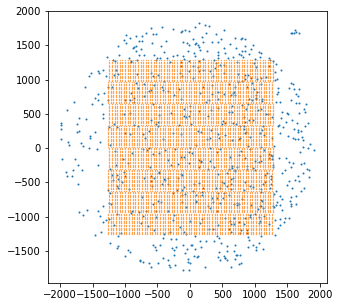

In [150]:
LED_locations = rgcm.get_led_locations('hinge')
plt.figure(figsize=(5,5))
plt.scatter(rgc_xvals,rgc_yvals,s=1)
plt.scatter(LED_locations[:,0],LED_locations[:,1], s=.1)
plt.savefig('hinge_ledloc.svg',dpi=500)

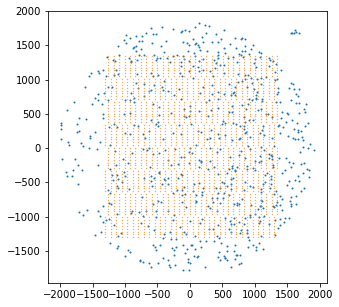

In [151]:
LED_locations = rgcm.get_led_locations('uturn')
plt.figure(figsize=(5,5))
plt.scatter(rgc_xvals,rgc_yvals,s=1)
plt.scatter(LED_locations[:,0],LED_locations[:,1], s=.1)
plt.savefig('uturn_ledloc.svg',dpi=500)

In [10]:
save_root = '/Users/alanmardinly/Documents/optics_simulation_results_empirical_uturn1'

files = os.listdir(save_root)
files = [file for file in files if file.endswith('.dat')]
files = [file for file in files if file.startswith('simulation')]

exposure_durations = [10]
df = pd.DataFrame(columns=['emission_profile', 'z_test', 'power_uw', 'soma_size_diameter_um', 'addressable_cells_by_single_pixel', 'useful_pixels', 'addressable_cells_by_whole_array', 'avg_num_pixels_to_spike'])
#LED_locations = pickle.load(open(os.path.join(save_root,'LED_locations.dat'),'rb'))
for file in files:
    file_dict = {}
    data = pickle.load(open(os.path.join(save_root,file),'rb'))
    file_dict['emission_profile'] = data['emission_profile']
    file_dict['z_test'] = data['z_test']
    file_dict['power_uw'] = data['power_uw']
    file_dict['soma_size_diameter_um'] = data['soma_size_diameter_um']
    # how many cells can we address via a single pixel activation by exposure duration?
    file_dict['addressable_cells_by_single_pixel']  = rgcm.get_num_addressable_cells(data, exposure_durations, spi)
    file_dict['useful_pixels']  = rgcm.get_num_useful_pixels(data, exposure_durations, spi)
    file_dict['addressable_cells_by_whole_array']  = rgcm.get_total_number_of_activatable_cells(data, exposure_durations, spi)
    file_dict['avg_num_pixels_to_spike']  = cell_activations_per_pixel(data, exposure_durations, spi)
    df = pd.concat([df, pd.DataFrame(file_dict)], ignore_index=True)
    #print(f'completed {file}')
uturn1_df = df

/Users/alanmardinly/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alanmardinly/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
color_list =cm.get_cmap('viridis', 6)

In [14]:
YL = [(0,500), (0, 0.6), (0,500), (0, 3.5)]

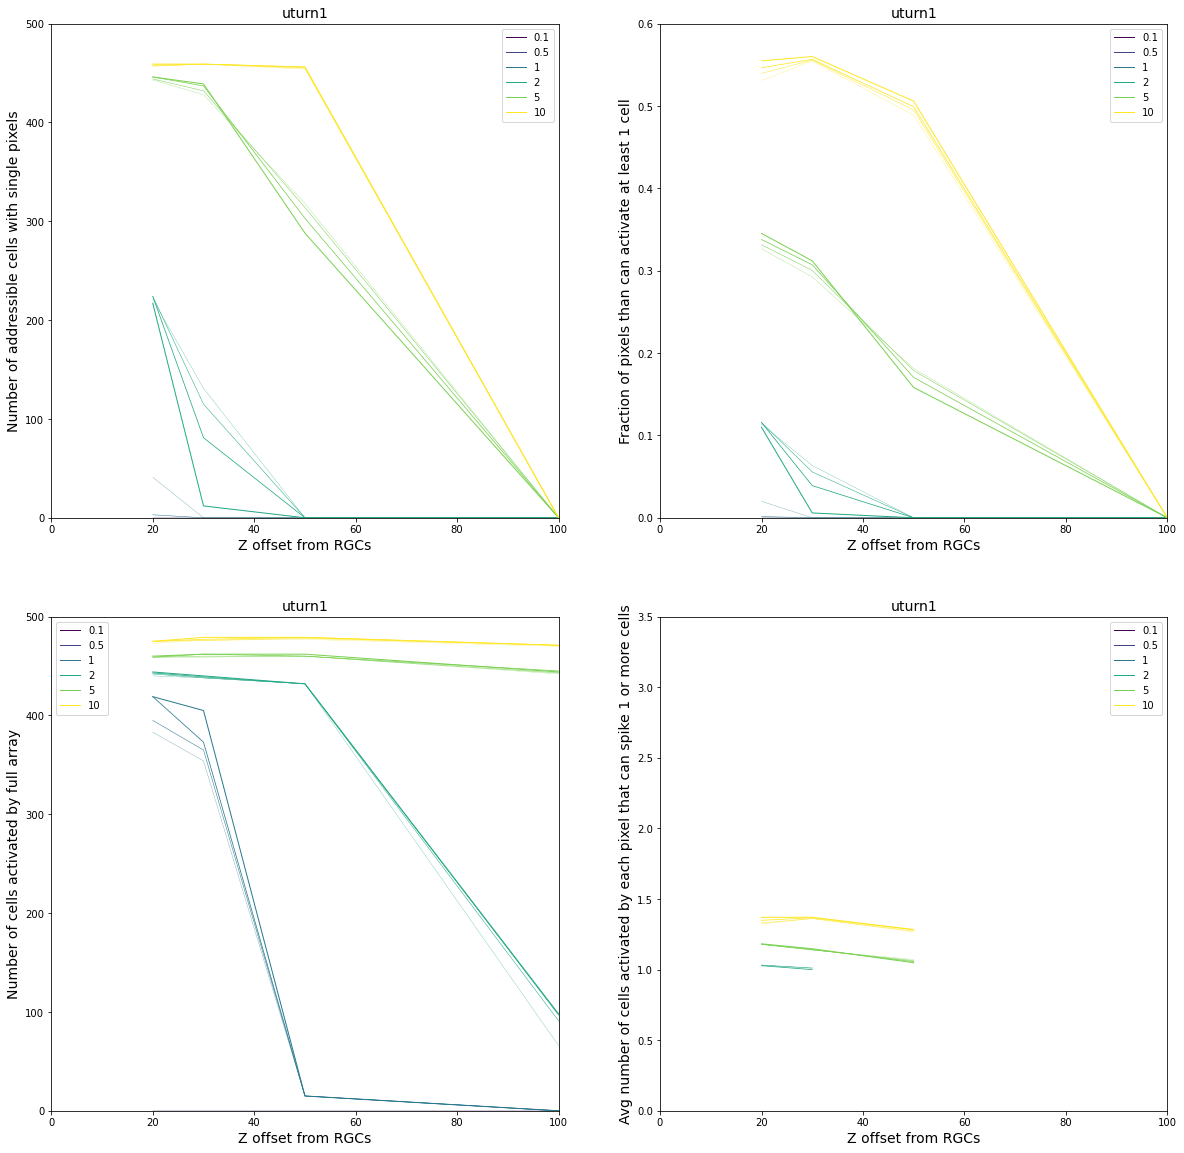

In [15]:
metrics=['addressable_cells_by_single_pixel', 'useful_pixels', 'addressable_cells_by_whole_array', 'avg_num_pixels_to_spike']
y_labels = ['Number of addressible cells with single pixels', 'Fraction of pixels than can activate at least 1 cell', 'Number of cells activated by full array', 'Avg number of cells activated by each pixel that can spike 1 or more cells']
plt.figure(figsize=(20,20))
params['emission'] = ['uturn1']
for k, metric in enumerate(metrics): 
    for j, emission in enumerate(params['emission']):
        plt.subplot(2,2,k+1)
        gdf = df.loc[df['emission_profile']==emission]
        alpha=0
        #viridis =cm.get_cmap('viridis', len(np.unique(gdf['soma_size_diameter_um'].values)))
        for i, power in enumerate(np.unique(gdf['power_uw'].values)):
            pdf = gdf.loc[gdf['power_uw']==power]
            for iii, soma_size in enumerate(np.unique(gdf['soma_size_diameter_um'].values)):
                spdf = pdf.loc[pdf['soma_size_diameter_um']==soma_size]
                idx = np.argsort(spdf['z_test'].values)
                if iii == 4:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], label=power, color = color_list(i), linewidth=iii/4)
                else:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], color = color_list(i), linewidth=iii/4)
        plt.xlim(0,200)
        #plt.ylim(0,.5)
        plt.title(f'{emission}', fontsize=14)
        plt.xlabel('Z offset from RGCs', fontsize=14)
        plt.ylabel(f'{y_labels[k]}', fontsize=14)
        plt.ylim(YL[k][0], YL[k][1])
        plt.legend()
        plt.xlim(0,100)

plt.savefig('uturn1_data.svg',dpi=500)

In [184]:
save_root = '/Users/alanmardinly/Documents/optics_simulation_results_empirical_uturn2'

files = os.listdir(save_root)
files = [file for file in files if file.endswith('.dat')]
files = [file for file in files if file.startswith('simulation')]

exposure_durations = [10]
df = pd.DataFrame(columns=['emission_profile', 'z_test', 'power_uw', 'soma_size_diameter_um', 'addressable_cells_by_single_pixel', 'useful_pixels', 'addressable_cells_by_whole_array', 'avg_num_pixels_to_spike'])
#LED_locations = pickle.load(open(os.path.join(save_root,'LED_locations.dat'),'rb'))
for file in files:
    file_dict = {}
    data = pickle.load(open(os.path.join(save_root,file),'rb'))
    file_dict['emission_profile'] = data['emission_profile']
    file_dict['z_test'] = data['z_test']
    file_dict['power_uw'] = data['power_uw']
    file_dict['soma_size_diameter_um'] = data['soma_size_diameter_um']
    # how many cells can we address via a single pixel activation by exposure duration?
    file_dict['addressable_cells_by_single_pixel']  = rgcm.get_num_addressable_cells(data, exposure_durations, spi)
    file_dict['useful_pixels']  = rgcm.get_num_useful_pixels(data, exposure_durations, spi)
    file_dict['addressable_cells_by_whole_array']  = rgcm.get_total_number_of_activatable_cells(data, exposure_durations, spi)
    file_dict['avg_num_pixels_to_spike']  = rgcm.get_mean_selectivity(data, exposure_durations, spi)
    file_dict['activation_per_pixel']  = cell_activations_per_pixel(data, exposure_durations, spi)

    df = pd.concat([df, pd.DataFrame(file_dict)], ignore_index=True)
    #print(f'completed {file}')
uturn2_df = df

/Users/alanmardinly/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alanmardinly/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


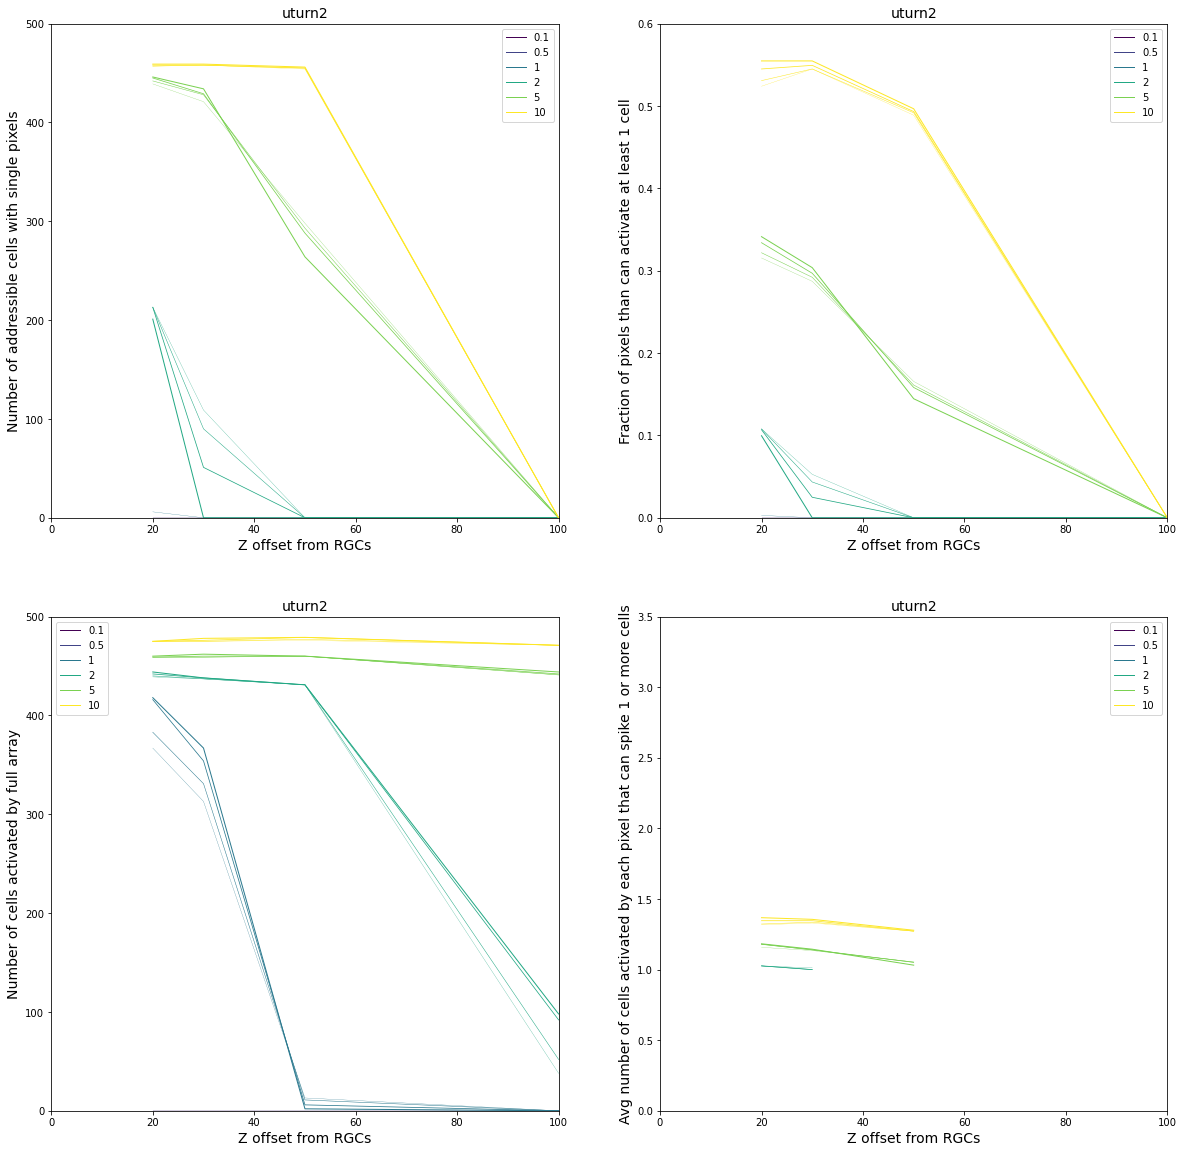

In [185]:
metrics=['addressable_cells_by_single_pixel', 'useful_pixels', 'addressable_cells_by_whole_array', 'activation_per_pixel']
y_labels = ['Number of addressible cells with single pixels', 'Fraction of pixels than can activate at least 1 cell', 'Number of cells activated by full array', 'Avg number of cells activated by each pixel that can spike 1 or more cells']
plt.figure(figsize=(20,20))
params['emission'] = ['uturn2']
for k, metric in enumerate(metrics): 
    for j, emission in enumerate(params['emission']):
        plt.subplot(2,2,k+1)
        gdf = df.loc[df['emission_profile']==emission]
        alpha=0
        #viridis =cm.get_cmap('viridis', len(np.unique(gdf['soma_size_diameter_um'].values)))
        for i, power in enumerate(np.unique(gdf['power_uw'].values)):
            pdf = gdf.loc[gdf['power_uw']==power]
            for iii, soma_size in enumerate(np.unique(gdf['soma_size_diameter_um'].values)):
                spdf = pdf.loc[pdf['soma_size_diameter_um']==soma_size]
                idx = np.argsort(spdf['z_test'].values)
                if iii == 4:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], label=power, color = color_list(i), linewidth=iii/4)
                else:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], color = color_list(i), linewidth=iii/4)

        #plt.ylim(0,.5)
        plt.title(f'{emission}', fontsize=14)
        plt.xlabel('Z offset from RGCs', fontsize=14)
        plt.ylabel(f'{y_labels[k]}', fontsize=14)
        plt.ylim(YL[k][0], YL[k][1])
        plt.xlim(0,100)

        plt.legend()
plt.savefig('uturn2_data.svg',dpi=500)

In [16]:
save_root = '/Users/alanmardinly/Documents/optics_simulation_results_empirical_hinge'

files = os.listdir(save_root)
files = [file for file in files if file.endswith('.dat')]
files = [file for file in files if file.startswith('simulation')]

exposure_durations = [10]
df = pd.DataFrame(columns=['emission_profile', 'z_test', 'power_uw', 'soma_size_diameter_um', 'addressable_cells_by_single_pixel', 'useful_pixels', 'addressable_cells_by_whole_array', 'avg_num_pixels_to_spike'])
#LED_locations = pickle.load(open(os.path.join(save_root,'LED_locations.dat'),'rb'))
for file in files:
    file_dict = {}
    data = pickle.load(open(os.path.join(save_root,file),'rb'))
    file_dict['emission_profile'] = data['emission_profile']
    file_dict['z_test'] = data['z_test']
    file_dict['power_uw'] = data['power_uw']
    file_dict['soma_size_diameter_um'] = data['soma_size_diameter_um']
    # how many cells can we address via a single pixel activation by exposure duration?
    file_dict['addressable_cells_by_single_pixel']  = rgcm.get_num_addressable_cells(data, exposure_durations, spi)
    file_dict['useful_pixels']  = rgcm.get_num_useful_pixels(data, exposure_durations, spi)
    file_dict['addressable_cells_by_whole_array']  = rgcm.get_total_number_of_activatable_cells(data, exposure_durations, spi)
    file_dict['avg_num_pixels_to_spike']  = rgcm.get_mean_selectivity(data, exposure_durations, spi)
    file_dict['activation_per_pixel']  = cell_activations_per_pixel(data, exposure_durations, spi)

    df = pd.concat([df, pd.DataFrame(file_dict)], ignore_index=True)
    #print(f'completed {file}')
hinge_df = df


/Users/alanmardinly/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alanmardinly/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


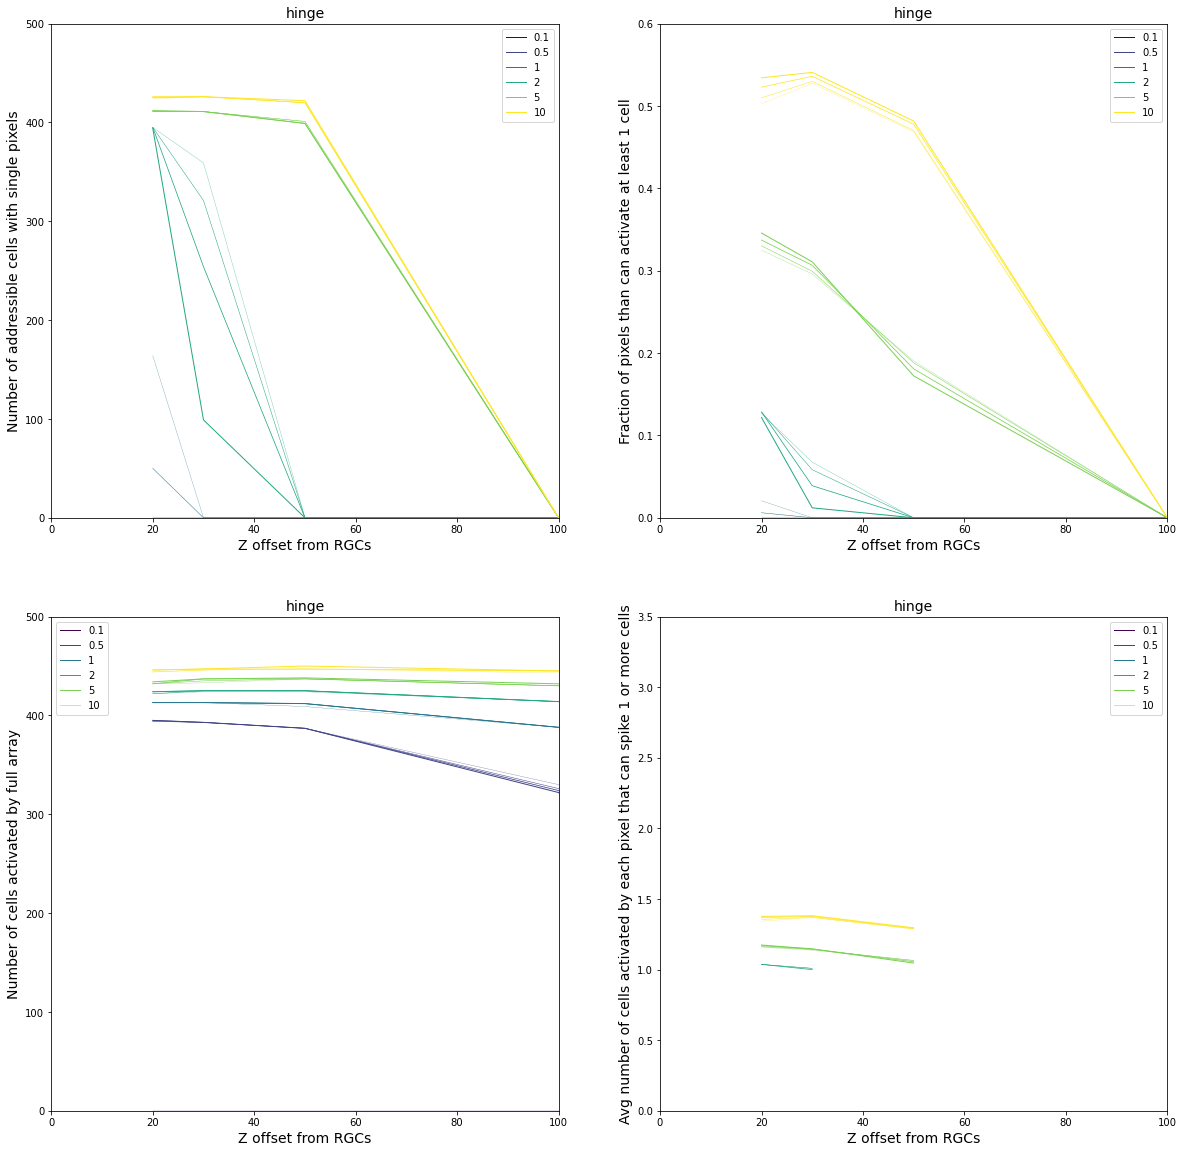

In [17]:
metrics=['addressable_cells_by_single_pixel', 'useful_pixels', 'addressable_cells_by_whole_array', 'activation_per_pixel']
y_labels = ['Number of addressible cells with single pixels', 'Fraction of pixels than can activate at least 1 cell', 'Number of cells activated by full array', 'Avg number of cells activated by each pixel that can spike 1 or more cells']
plt.figure(figsize=(20,20))
params['emission'] = ['hinge']
for k, metric in enumerate(metrics): 
    for j, emission in enumerate(params['emission']):
        plt.subplot(2,2,k+1)
        gdf = df.loc[df['emission_profile']==emission]
        alpha=0
        #viridis =cm.get_cmap('viridis', len(np.unique(gdf['soma_size_diameter_um'].values)))
        for i, power in enumerate(np.unique(gdf['power_uw'].values)):
            pdf = gdf.loc[gdf['power_uw']==power]
            for iii, soma_size in enumerate(np.unique(gdf['soma_size_diameter_um'].values)):
                spdf = pdf.loc[pdf['soma_size_diameter_um']==soma_size]
                idx = np.argsort(spdf['z_test'].values)
                if iii == 4:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], label=power, color = color_list(i), linewidth=iii/4)
                else:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], color = color_list(i), linewidth=iii/4)

        #plt.ylim(0,.5)
        plt.title(f'{emission}', fontsize=14)
        plt.xlabel('Z offset from RGCs', fontsize=14)
        plt.ylabel(f'{y_labels[k]}', fontsize=14)
        plt.ylim(YL[k][0], YL[k][1])
        plt.xlim(0,100)

        plt.legend()
plt.savefig('hinge_data.svg',dpi=500)

6.8591030770957415


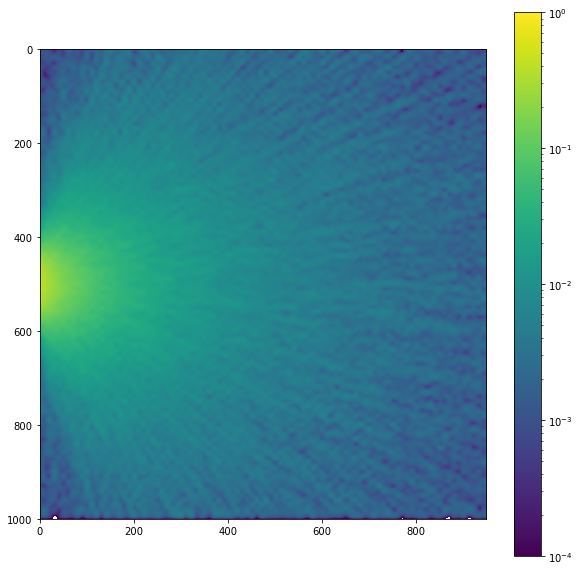

In [136]:
    [numPhotons, b, c, d, md, f, g]=np.load('/Users/alanmardinly/Documents/MeasBeam_20by34um_nph1e6_glass2retina_noAperture.npy', allow_pickle=True)
    LEDarea = .0020*.0034

    soma_diameter_um=.1
    dz = md.dz
    nz = md.nz
    dr = md.dr
    nr = md.nr
    ixy_cent = md.ixy_cent
    # average over center values to denoise

    #crop out first 10um of stack-up, to zero z at surface of passivation
    dz_crop = 10*1e-4  # cm
    iz_crop = int(dz_crop/dz)
    Flux_crop = md.Flux_xyz[:,:,iz_crop:]  #cropped flux

    flux_sc = Flux_crop/numPhotons*LEDarea/dr**2  # flux scaled to LEDirradiance=1
    rsoma = (soma_diameter_um / 2) / 10000  #convert from diameter um to radius cm

    irrOnSoma = np.zeros([np.shape(flux_sc)[0],np.shape(flux_sc)[2]])
    for iz in np.arange(np.shape(flux_sc)[2]):
        for ix in np.arange(np.shape(flux_sc)[0]):
            dat = flux_sc[:,:,iz]
            irrOnSoma[ix,iz] = rgcm.avg_over_soma(dat,ix,ixy_cent,rsoma,dr)

    raxis = np.linspace(-dr*ixy_cent,dr*ixy_cent,np.shape(irrOnSoma)[0])*1e4
    zaxis = np.arange(0,dz*(nz-iz_crop),dz)*1e4


    from scipy import interpolate
    f = interpolate.interp2d(zaxis, raxis, irrOnSoma, kind='cubic')

    rnew = np.arange(-dr*ixy_cent,dr*(ixy_cent+1e-6),dr/10)*1e4  # um
    znew = np.arange(0,dz*(nz-iz_crop),dz/10)*1e4  # um
    irrOnSoma_new = f(znew,rnew)
    plt.figure(figsize=(10,10))
    plt.imshow(irrOnSoma_new,norm=LogNorm())
    
    plt.clim(1e-4,1)
    plt.colorbar()
    results=rgcm.get_point_irradiance([0],[0],z_test=50, power_uW=10, ledx=50,ledy=10, model=irrOnSoma_new, rn=rnew, zn=znew, LEDarea_cm2=LEDarea)
    print(results)
    plt.savefig('uturn2.svg',dpi=500)

30.459708470118525


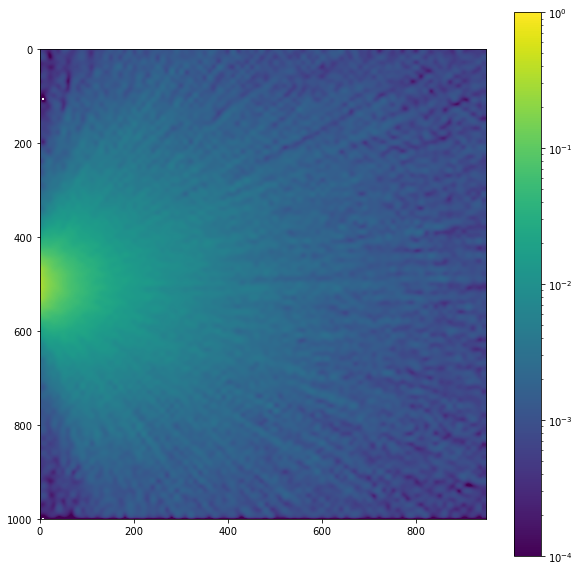

In [201]:
    from matplotlib.colors import LogNorm

    [numPhotons, b, c, d, md, f, g]=np.load('/Users/alanmardinly/Documents/MeasBeam_15by19um_nph1e6_glass2retina_noAperture.npy', allow_pickle=True)
    LEDarea = .0015*.0019

    soma_diameter_um=.1
    dz = md.dz
    nz = md.nz
    dr = md.dr
    nr = md.nr
    ixy_cent = md.ixy_cent
    # average over center values to denoise

    #crop out first 10um of stack-up, to zero z at surface of passivation
    dz_crop = 10*1e-4  # cm
    iz_crop = int(dz_crop/dz)
    Flux_crop = md.Flux_xyz[:,:,iz_crop:]  #cropped flux

    flux_sc = Flux_crop/numPhotons*LEDarea/dr**2  # flux scaled to LEDirradiance=1
    rsoma = (soma_diameter_um / 2) / 10000  #convert from diameter um to radius cm

    irrOnSoma = np.zeros([np.shape(flux_sc)[0],np.shape(flux_sc)[2]])
    for iz in np.arange(np.shape(flux_sc)[2]):
        for ix in np.arange(np.shape(flux_sc)[0]):
            dat = flux_sc[:,:,iz]
            irrOnSoma[ix,iz] = rgcm.avg_over_soma(dat,ix,ixy_cent,rsoma,dr)

    raxis = np.linspace(-dr*ixy_cent,dr*ixy_cent,np.shape(irrOnSoma)[0])*1e4
    zaxis = np.arange(0,dz*(nz-iz_crop),dz)*1e4


    from scipy import interpolate
    f = interpolate.interp2d(zaxis, raxis, irrOnSoma, kind='cubic')

    rnew = np.arange(-dr*ixy_cent,dr*(ixy_cent+1e-6),dr/10)*1e4  # um
    znew = np.arange(0,dz*(nz-iz_crop),dz/10)*1e4  # um
    irrOnSoma_new = f(znew,rnew)
    plt.figure(figsize=(10,10))
    plt.imshow(irrOnSoma_new, norm=LogNorm())
    plt.clim(1e-4,1)
    plt.colorbar()
    results=rgcm.get_point_irradiance([0],[0],z_test=20, power_uW=2, ledx=0,ledy=0, model=irrOnSoma_new, rn=rnew, zn=znew, LEDarea_cm2=LEDarea)
    plt.savefig('uturn1.svg',dpi=500)   
    print(results)

4.212565851277289


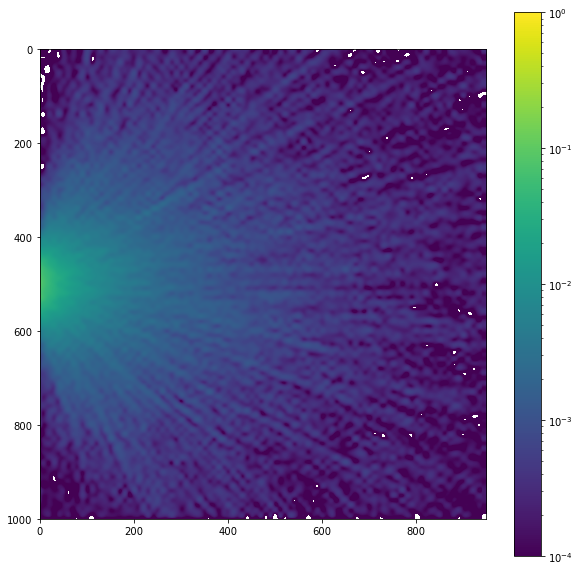

In [199]:
    [numPhotons, b, c, d, md, f, g]=np.load('/Users/alanmardinly/Documents/MeasBeam_nph3e5_glass2retina_noAperture.npy', allow_pickle=True)
    LEDarea = .0011*.0006

    soma_diameter_um=.1
    dz = md.dz
    nz = md.nz
    dr = md.dr
    nr = md.nr
    ixy_cent = md.ixy_cent
    # average over center values to denoise

    #crop out first 10um of stack-up, to zero z at surface of passivation
    dz_crop = 10*1e-4  # cm
    iz_crop = int(dz_crop/dz)
    Flux_crop = md.Flux_xyz[:,:,iz_crop:]  #cropped flux

    flux_sc = Flux_crop/numPhotons*LEDarea/dr**2  # flux scaled to LEDirradiance=1
    rsoma = (soma_diameter_um / 2) / 10000  #convert from diameter um to radius cm

    irrOnSoma = np.zeros([np.shape(flux_sc)[0],np.shape(flux_sc)[2]])
    for iz in np.arange(np.shape(flux_sc)[2]):
        for ix in np.arange(np.shape(flux_sc)[0]):
            dat = flux_sc[:,:,iz]
            irrOnSoma[ix,iz] = rgcm.avg_over_soma(dat,ix,ixy_cent,rsoma,dr)

    raxis = np.linspace(-dr*ixy_cent,dr*ixy_cent,np.shape(irrOnSoma)[0])*1e4
    zaxis = np.arange(0,dz*(nz-iz_crop),dz)*1e4


    from scipy import interpolate
    f = interpolate.interp2d(zaxis, raxis, irrOnSoma, kind='cubic')

    rnew = np.arange(-dr*ixy_cent,dr*(ixy_cent+1e-6),dr/10)*1e4  # um
    znew = np.arange(0,dz*(nz-iz_crop),dz/10)*1e4  # um
    irrOnSoma_new = f(znew,rnew)
    plt.figure(figsize=(10,10))
    plt.imshow(irrOnSoma_new, norm=LogNorm())
    plt.clim(1e-4,1)
    plt.colorbar()
    results=rgcm.get_point_irradiance([0],[0],z_test=50, power_uW=10, ledx=50,ledy=10, model=irrOnSoma_new, rn=rnew, zn=znew, LEDarea_cm2=LEDarea)
    print(results)
    plt.savefig('hinge.svg',dpi=500)

In [ ]:
np.sum(data['results']>threshold)

0

In [9]:
def cell_activations_per_pixel(data, exposure_durations, spi):


    #spi is spike probability interpolation model

    activation_profile =[]
    for exposure_duration in exposure_durations:
        activation_per_pixel = []

        for irradiance in range(1,22):
            if rgcm.get_spike_prob(spi, irradiance, exposure_duration) > 0.9:
                threshold = irradiance
                break
        for pixel in range(np.shape(data['results'])[0]):
            activation_per_pixel.append(np.sum(data['results'][pixel,:] > threshold))
        selective_activations = np.array(activation_per_pixel)
        activation_profile.append(np.mean(selective_activations[selective_activations>0]))

    return activation_profile

In [ ]:
metrics=['addressable_cells_by_single_pixel', 'useful_pixels', 'addressable_cells_by_whole_array', 'activation_per_pixel']
y_labels = ['Number of addressible cells with single pixels', 'Fraction of pixels than can activate at least 1 cell', 'Number of cells activated by full array', 'Avg number of cells activated by each pixel that can spike 1 or more cells']
plt.figure(figsize=(20,20))
params['emission'] = ['hinge']
for k, metric in enumerate(metrics): 
    for j, emission in enumerate(params['emission']):
        plt.subplot(2,2,k+1)
        gdf = df.loc[df['emission_profile']==emission]
        alpha=0
        #viridis =cm.get_cmap('viridis', len(np.unique(gdf['soma_size_diameter_um'].values)))
        for i, power in enumerate(np.unique(gdf['power_uw'].values)):
            pdf = gdf.loc[gdf['power_uw']==power]
            for iii, soma_size in enumerate(np.unique(gdf['soma_size_diameter_um'].values)):
                spdf = pdf.loc[pdf['soma_size_diameter_um']==soma_size]
                idx = np.argsort(spdf['z_test'].values)
                if iii == 4:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], label=power, color = color_list[i], linewidth=iii)
                else:
                    plt.plot(spdf['z_test'].values[idx], spdf[metric].values[idx], color = color_list[i], linewidth=iii)

        #plt.ylim(0,.5)
        plt.title(f'{emission}', fontsize=14)
        plt.xlabel('Z offset from RGCs', fontsize=14)
        plt.ylabel(f'{y_labels[k]}', fontsize=14)
        plt.legend()